In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Load the image in grayscale mode
img = cv2.imread('rabbit.jpg', 0)

# Get the image dimensions
rows, cols = img.shape
print("Image dimension: ", rows, cols)

Image dimension:  575 700


In [3]:
# Initialize the histogram
hist = np.zeros(256)

# Compute the histogram of the image
for i in range(rows):
    for j in range(cols):
        hist[img[i, j]] += 1

In [4]:
# Normalize the histogram
hist = hist / (rows * cols)

# Compute the cumulative distribution function (CDF)
cdf = np.zeros(256)
cdf[0] = hist[0]
for i in range(1, 256):
    cdf[i] = cdf[i - 1] + hist[i]

# Multiply by 255 to scale to the range [0, 255] and round to the nearest integer
cdf_normalized = np.round(cdf * 255).astype(np.uint8)

In [5]:
# Create a new image using the equalized histogram
equalized_img = np.zeros_like(img)
for i in range(rows):
    for j in range(cols):
        equalized_img[i, j] = cdf_normalized[img[i, j]]

# Compute the histogram for the equalized image
equalized_hist = np.zeros(256)
for i in range(rows):
    for j in range(cols):
        equalized_hist[equalized_img[i, j]] += 1

In [6]:
# Normalize the equalized histogram
equalized_hist = equalized_hist / (rows * cols)

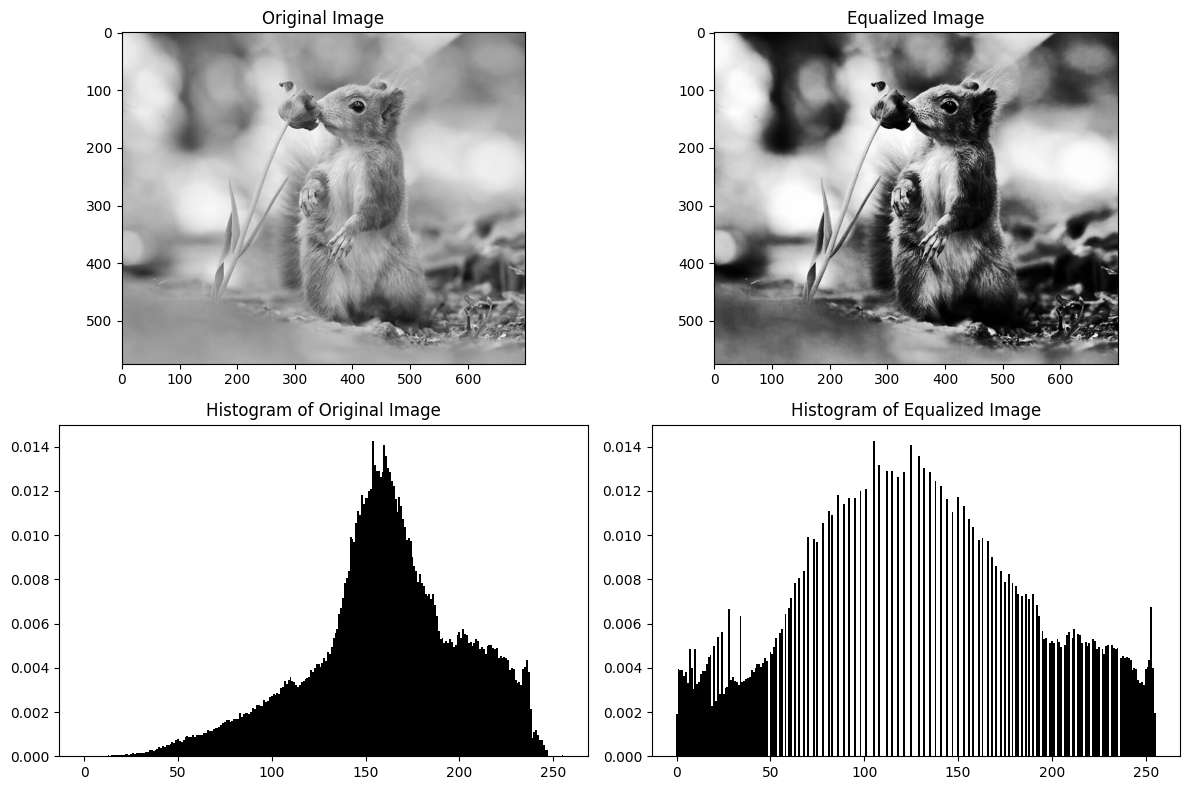

In [7]:
# Plot the original and equalized images along with their histograms
plt.figure(figsize=(12, 8))

# Plot original image
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Plot equalized image
plt.subplot(2, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')

# Plot histogram of original image
plt.subplot(2, 2, 3)
plt.bar(np.arange(256), hist, width=1, color='black')
plt.title('Histogram of Original Image')

# Plot histogram of equalized image
plt.subplot(2, 2, 4)
plt.bar(np.arange(256), equalized_hist, width=1, color='black')
plt.title('Histogram of Equalized Image')

plt.tight_layout()
plt.show()